In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# use this df to train model
gene_GEP_mapping = pd.read_csv(r'./data/Factorized matrices from human lifetime scRNA(Gene Z-score x GEP).csv').set_index('Gene')
gene_GEP_mapping.sort_values('GEP 15 (DNA Replication)', ascending=False)

GEP 1 (Mono/DC)  GEP 2 (single donor-specific)     GEP 3  \
Gene                                                                 
HSP90AA1        -0.000571                      -0.001267  0.000145   
HSPA8           -0.000386                      -0.000714  0.000421   
HSPD1           -0.001226                      -0.000743  0.000137   
PCNA             0.000824                      -0.000578 -0.000212   
ENO1            -0.001432                       0.000097 -0.000298   
...                   ...                            ...       ...   
MT.ATP6         -0.001644                       0.001148 -0.000422   
MT.ND3          -0.001785                       0.000449 -0.000447   
MT.ND4          -0.001552                       0.000492 -0.000194   
MT.ND1          -0.002089                       0.002177 -0.000132   
MT.ND2          -0.002370                       0.000610 -0.000075   

          GEP 4 (Elderly-HSC)     GEP 5     GEP 6     GEP 7     GEP 8  \
Gene                                                                    
HSP90AA1            -0.002271  0.000087  0.000260  0.000149 -0.000667   
HSPA8               -0.002554 -0.000031 -0.000005 -0.000133 -0.000179   
HSPD1               -0.001338  0.000173 -0.000078  0.000153 -0.000216   
PCNA                -0.002021 -0.000021  0.000122  0.000328 -0.000281   
ENO1                -0.001244 -0.000099 -0.000351 -0.000614 -0.000337   
...                       ...       ...       ...       ...       ...   
MT.ATP6             -0.003019 -0.000461 -0.000170 -0.000564 -0.000926   
MT.ND3              -0.001568 -0.000489 -0.000502 -0.000675 -0.001282   
MT.ND4              -0.002645 -0.000639 -0.000197 -0.000672 -0.000636   
MT.ND1              -0.002620 -0.000923 -0.000133 -0.000388 -0.000620   
MT.ND2              -0.000579 -0.000790 -0.000304 -0.000313 -0.000674   

             GEP 9    GEP 10    GEP 11    GEP 12    GEP 13  GEP 14 (Meg)  \
Gene                                                                       
HSP90AA1 -0.001142 -0.000407 -0.000266  0.000033 -0.001039     -0.000712   
HSPA8    -0.000283 -0.000454 -0.000315 -0.000289 -0.000482     -0.000055   
HSPD1    -0.000640 -0.000520 -0.000308 -0.000102 -0.000563     -0.000868   
PCNA     -0.000509 -0.000379  0.000018 -0.000147 -0.000552     -0.000340   
ENO1     -0.001219 -0.000270  0.000283 -0.000765 -0.001300     -0.000981   
...            ...       ...       ...       ...       ...           ...   
MT.ATP6  -0.000908 -0.000788 -0.000403 -0.000625 -0.000711     -0.000251   
MT.ND3   -0.000915 -0.001046 -0.000356 -0.000568 -0.000836     -0.000940   
MT.ND4   -0.000593 -0.000761 -0.000339 -0.000472 -0.000698     -0.000186   
MT.ND1   -0.000868 -0.000640 -0.000102 -0.000430 -0.001089     -0.000593   
MT.ND2   -0.000973 -0.000668 -0.000208 -0.000208 -0.000909     -0.000569   

          GEP 15 (DNA Replication)    GEP 16    GEP 17    GEP 18    GEP 19  \
Gene                                                                         
HSP90AA1                  0.004280 -0.000968 -0.000900 -0.000303 -0.000567   
HSPA8                     0.003836 -0.001154 -0.000167 -0.000438 -0.000349   
HSPD1                     0.003761 -0.001150 -0.000478 -0.000098 -0.000486   
PCNA                      0.002920 -0.000835 -0.000698 -0.000140 -0.000337   
ENO1                      0.002909 -0.000270 -0.000161 -0.000423 -0.000475   
...                            ...       ...       ...       ...       ...   
MT.ATP6                  -0.002892 -0.001109 -0.000804 -0.000573 -0.000892   
MT.ND3                   -0.003139 -0.001099 -0.001067 -0.000772 -0.000804   
MT.ND4                   -0.003290 -0.001258 -0.000833 -0.000631 -0.001011   
MT.ND1                   -0.003396 -0.000884 -0.001129 -0.000574 -0.000836   
MT.ND2                   -0.003831 -0.001034 -0.001316 -0.000511 -0.000318   

            GEP 20  GEP 21 (Mitochondiral genes)  GEP 22 (Cell cycle)  \
Gene                                                                    

is there a way to determine which genes contribute most to GEP 15?

<Axes: >

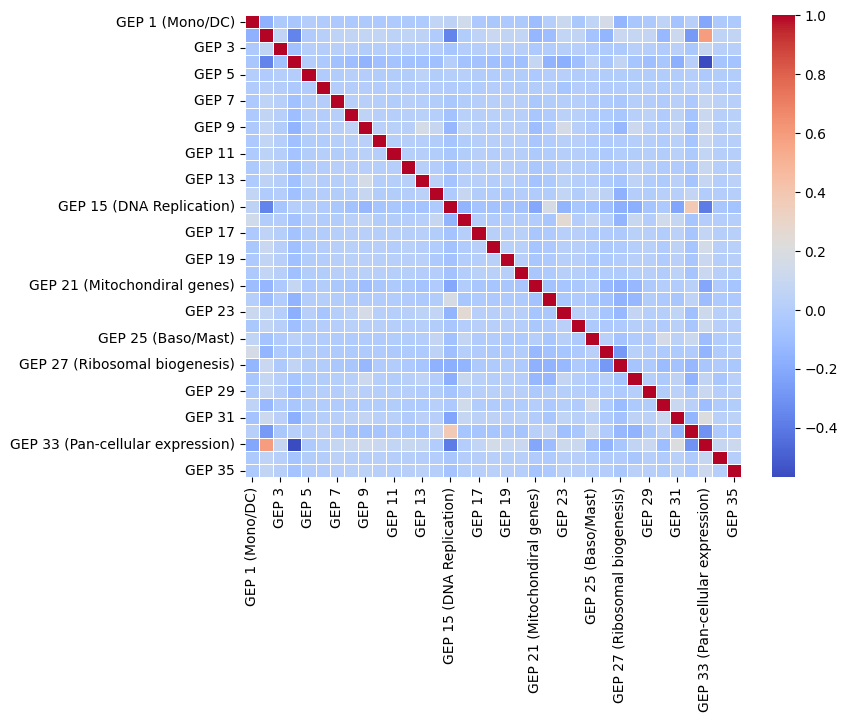

In [3]:
plt.figure(figsize=(8, 6))
sns.heatmap(gene_GEP_mapping.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

We want to predict GEP 15

should I use GEP 15 to help predict GEP 22 and vice versa? (do we have access to that data at time of prediction?)

feature engineering ideas?
-standardize?
-binarize?

In [4]:
# do not use this df to train model
cell_GEP_mapping = pd.read_csv(r'./data/Factorized matrices from human lifetime scRNA(GEP usage per cell).csv').set_index('Cell')
cell_GEP_mapping

GEP 1 (Mono/DC)  GEP 2 (single donor-specific)     GEP 3  \
Cell                                                                      
BM1_bcBSQM            0.036803                       0.026881  0.012481   
BM1_bcCHLB            0.010666                       0.000000  0.000000   
BM1_bcFZFC            0.062572                       0.000000  0.006028   
BM1_bcGZEW            0.045451                       0.031609  0.000000   
BM1_bcFMRM            0.041508                       0.000000  0.000000   
...                        ...                            ...       ...   
Samp26_bcDOUR         0.000000                       0.000000  0.000000   
Samp26_bcFXTL         0.000000                       0.010715  0.000000   
Samp26_bcBAMF         0.000000                       0.000000  0.000000   
Samp26_bcFDMD         0.283959                       0.000000  0.000000   
Samp26_bcIGXL         0.000000                       0.000000  0.000000   

               GEP 4 (Elderly-HSC)     GEP 5  GEP 6     GEP 7     GEP 8  \
Cell                                                                      
BM1_bcBSQM                0.464846  0.000000    0.0  0.000000  0.000000   
BM1_bcCHLB                0.435595  0.000000    0.0  0.020563  0.011753   
BM1_bcFZFC                0.396839  0.000000    0.0  0.000000  0.007984   
BM1_bcGZEW                0.517612  0.000000    0.0  0.000000  0.009147   
BM1_bcFMRM                0.302918  0.000057    0.0  0.000000  0.000000   
...                            ...       ...    ...       ...       ...   
Samp26_bcDOUR             0.193369  0.000000    0.0  0.000000  0.000000   
Samp26_bcFXTL             0.000000  0.000000    0.0  0.034336  0.001359   
Samp26_bcBAMF             0.000000  0.024843    0.0  0.000000  0.000000   
Samp26_bcFDMD             0.000000  0.000000    0.0  0.000000  0.000000   
Samp26_bcIGXL             0.000000  0.000000    0.0  0.000000  0.000000   

                  GEP 9    GEP 10    GEP 11    GEP 12    GEP 13  GEP 14 (Meg)  \
Cell                                                                            
BM1_bcBSQM     0.000000  0.000000  0.000645  0.002771  0.000000      0.000000   
BM1_bcCHLB     0.016536  0.017280  0.000000  0.033893  0.000681      0.029359   
BM1_bcFZFC     0.047616  0.005497  0.000000  0.000000  0.000000      0.026648   
BM1_bcGZEW     0.031807  0.000000  0.006016  0.000000  0.000000      0.016127   
BM1_bcFMRM     0.000000  0.000000  0.000000  0.003737  0.000000      0.000000   
...                 ...       ...       ...       ...       ...           ...   
Samp26_bcDOUR  0.000000  0.010407  0.059297  0.003915  0.002130      0.000000   
Samp26_bcFXTL  0.117130  0.000000  0.000000  0.000000  0.000000      0.000000   
Samp26_bcBAMF  0.021102  0.000862  0.000000  0.036191  0.000393      0.000000   
Samp26_bcFDMD  0.000000  0.018620  0.005843  0.000000  0.008682      0.000000   
Samp26_bcIGXL  0.000000  0.059775  0.000000  0.024721  0.030192      0.000000   

               GEP 15 (DNA Replication)    GEP 16    GEP 17    GEP 18  \
Cell                                                                    
BM1_bcBSQM                     0.111207  0.000000  0.001688  0.000000   
BM1_bcCHLB                     0.070330  0.000000  0.000000  0.000000   
BM1_bcFZFC                     0.161894  0.000000  0.000000  0.001741   
BM1_bcGZEW                     0.083941  0.000000  0.000000  0.000000   
BM1_bcFMRM                     0.225007  0.000000  0.000000  0.010482   
...                                 ...       ...       ...       ...   
Samp26_bcDOUR                  0.000000  0.001742  0.000000  0.091761   
Samp26_bcFXTL                  0.091387  0.000000  0.177696  0.000000   
Samp26_bcBAMF                  0.000000  0.002063  0.039826  0.001515   
Samp26_bcFDMD                  0.000000  0.000000  0.000000  0.001395   
Samp26_bcIGXL                  0.000000  0.006953  0.071843  0.051344   

                 GEP 19    GEP 20  GEP 21 (Mitochondiral ge

(array([24560., 11649.,  8528.,  5476.,  3258.,  2053.,  1312.,   635.,
          182.,    25.]),
 array([0.        , 0.07635377, 0.15270755, 0.22906132, 0.3054151 ,
        0.38176887, 0.45812265, 0.53447642, 0.6108302 , 0.68718397,
        0.76353775]),
 <BarContainer object of 10 artists>)

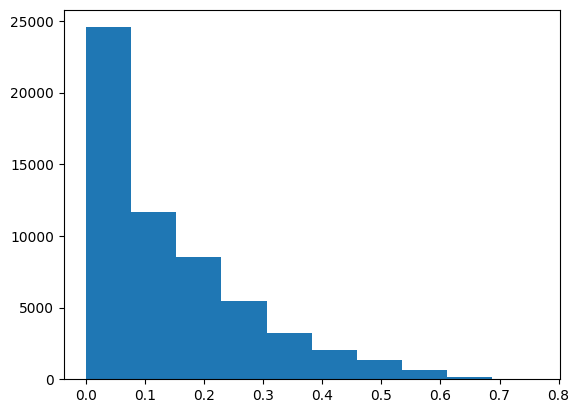

In [5]:
plt.hist(cell_GEP_mapping['GEP 15 (DNA Replication)'])

In [6]:
adata = sc.read_h5ad("./data/seurat_object.h5ad")

# Extract the expression matrix (cells x genes)
expression_df = pd.DataFrame(
    adata.X, 
    index=adata.obs.index, 
    columns=adata.var.index
)

# Extract cell metadata
cell_metadata_df = adata.obs

# Extract gene metadata
gene_metadata_df = adata.var

rows are cells, columns are genes

get 50k by 40k cell to gene mapping data - ask parker

do some concatenation and transposes, predict GEP 15?

In [7]:
expression_df # cell to gene mapping

A2M     AAMDC  ABC7.42404400C24.1     ABCA1   ABCA13  \
BM1_bcBSQM     2.878347 -0.218468           -0.088631 -0.348194 -0.35775   
BM1_bcCHLB    -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
BM1_bcFZFC    -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
BM1_bcGZEW    -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
BM1_bcFMRM    -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
...                 ...       ...                 ...       ...      ...   
Samp26_bcFXTL -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
Samp26_bcBAMF -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
Samp26_bcFDMD -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
Samp26_bcIGXL -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   
Samp26_bcGOWF -0.275630 -0.218468           -0.088631 -0.348194 -0.35775   

                  ABHD8       ABO  AC002076.10  AC002117.1  AC002465.2  \
BM1_bcBSQM    -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
BM1_bcCHLB    -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
BM1_bcFZFC    -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
BM1_bcGZEW    -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
BM1_bcFMRM    -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
...                 ...       ...          ...         ...         ...   
Samp26_bcFXTL -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
Samp26_bcBAMF -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
Samp26_bcFDMD -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
Samp26_bcIGXL -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   
Samp26_bcGOWF -0.132304 -0.262591    -0.085788    -0.11376   -0.060753   

               AC004067.5  AC004540.4  AC004540.5  AC004791.2  AC004837.5  \
BM1_bcBSQM      -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
BM1_bcCHLB      -0.100287   -0.156732    5.717566    -0.13039   -0.134612   
BM1_bcFZFC      -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
BM1_bcGZEW      -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
BM1_bcFMRM      -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
...                   ...         ...         ...         ...         ...   
Samp26_bcFXTL   -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
Samp26_bcBAMF   -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
Samp26_bcFDMD   -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
Samp26_bcIGXL   -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   
Samp26_bcGOWF   -0.100287   -0.156732   -0.144077    -0.13039   -0.134612   

               AC004854.4  AC005082.12  AC005355.1  AC005387.2  AC005593.2  \
BM1_bcBSQM      -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
BM1_bcCHLB      -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
BM1_bcFZFC      -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
BM1_bcGZEW      -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
BM1_bcFMRM      -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
...                   ...          ...         ...         ...         ...   
Samp26_bcFXTL   -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
Samp26_bcBAMF   -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
Samp26_bcFDMD   -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
Samp26_bcIGXL   -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   
Samp26_bcGOWF   -0.080558    -0.150847   -0.085193    -0.14696   -0.058667   

               AC005618.6  AC006019.3  AC006486.10  AC007395.3  AC008073.7  \
BM1_bcBSQM      -0.135351   -0.072046    -0.116042   -0.055448   -0.077973   
BM1_bcCHLB      -0.135351   -0.072046    -0.116042   -0.055448   -0.077973   
BM1_bcFZFC      -0.135351   -0.072046    -0.116042   -0.055448   -0.077973   
BM1_bcGZEW      -0.135351   -0.072046    -0.

In [8]:
cell_metadata_df # cell metadata

orig.ident  nCount_RNA  nFeature_RNA  sample     age  \
BM1_bcBSQM              0      5125.0          2140     BM1  25yr-1   
BM1_bcCHLB              0      5050.0          2116     BM1  25yr-1   
BM1_bcFZFC              0      4761.0          2024     BM1  25yr-1   
BM1_bcGZEW              0      4119.0          1754     BM1  25yr-1   
BM1_bcFMRM              0      4575.0          1952     BM1  25yr-1   
...                   ...         ...           ...     ...     ...   
Samp26_bcFXTL           0       379.0           321  Samp26    53yr   
Samp26_bcBAMF           0       280.0           232  Samp26    53yr   
Samp26_bcFDMD           0       264.0           206  Samp26    53yr   
Samp26_bcIGXL           0       267.0           228  Samp26    53yr   
Samp26_bcGOWF           0       196.0           159  Samp26    53yr   

                   cluster broad_age_range narrow_age_range subcluster  
BM1_bcBSQM     Uncommitted           Adult            Adult      MPP-1  
BM1_bcCHLB     Uncommitted           Adult            Adult        HSC  
BM1_bcFZFC     Uncommitted           Adult            Adult      MPP-1  
BM1_bcGZEW     Uncommitted           Adult            Adult        HSC  
BM1_bcFMRM     Uncommitted           Adult            Adult      MPP-1  
...                    ...             ...              ...        ...  
Samp26_bcFXTL     Lymphoid           Adult            Adult  Ly-Prog-3  
Samp26_bcBAMF     Lymphoid           Adult            Adult  Ly-Prog-5  
Samp26_bcFDMD  Monocyte/DC           Adult            Adult   pDC-Prog  
Samp26_bcIGXL     Lymphoid           Adult            Adult  Ly-Prog-3  
Samp26_bcGOWF  Granulocyte           Adult            Adult   G-Prog-2  

[58041 rows x 9 columns]

In [9]:
gene_metadata_df.head() # gene metadata

vst.mean  vst.variance  vst.variance.expected  \
A2M                 0.110991      0.216558               0.160454   
AAMDC               0.071897      0.129066               0.096791   
ABC7.42404400C24.1  0.010269      0.018227               0.011460   
ABCA1               0.178667      0.385858               0.285560   
ABCA13              0.183784      0.389397               0.295728   

                    vst.variance.standardized  vst.variable  
A2M                                  1.349653             1  
AAMDC                                1.333451             1  
ABC7.42404400C24.1                   1.590453             1  
ABCA1                                1.351235             1  
ABCA13                               1.316737             1